In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring seaborn style
sns.set(style="whitegrid")

### Step 1: Input Data
We have the following user-movie rating matrix \( R \):

$$
R = \begin{bmatrix}4 & 5 & 0 $$3 & 0 & 2 \\0 & 4 & 5 \\1 & 0 & 3\end{bmatrix}
$$

Each row represents a user, and each column represents a movie. The values indicate ratings (0 means no rating).


In [40]:
# Matrix R: User-Movie Ratings
R = np.array([
    [4, 5, 0],
    [3, 0, 2],
    [0, 4, 5],
    [1, 0, 3]
])

# Displaying R
R

array([[4, 5, 0],
       [3, 0, 2],
       [0, 4, 5],
       [1, 0, 3]])

### Step 2: Covariance Matrix
When working with a non-square matrix like $( R )$ (user-movie ratings), directly performing eigen decomposition is not possible because eigenvalues and eigenvectors are defined only for square matrices. Therefore, we use the **covariance matrix** to extract meaningful information.

#### Why Use the Covariance Matrix?
1. **Dimensionality**: The original matrix $( R )$ is not square because there are more users (rows) than movies (columns), or vice versa. This makes it unsuitable for direct eigen decomposition.
2. **Capture Relationships**: The covariance matrix $( C = R^T R )$ summarizes the relationships between movies by aggregating user ratings. Each entry $( C_{ij} )$ in $( C )$ represents how movies $( i )$ and $( j )$ are related based on users' ratings.
3. **SVD Equivalence**: Using $( R^T R )$ is mathematically equivalent to applying **Singular Value Decomposition (SVD)**, which generalizes eigen decomposition to rectangular matrices. The eigenvalues of $( C )$ correspond to the squared singular values of $( R )$, and the eigenvectors of $( C )$ describe the directions of maximum variance for the movies.
  
#### Mathematical Explanation:
Given $( R )$, a matrix of size $( m \times n )$ (users × movies):
- $( R^T )$ has size $( n \times m )$.
- $( C = R^T R )$ results in a square matrix of size $( n \times n )$, where $( n )$ is the number of movies.

#### Result:
The covariance matrix $( C )$ summarizes how strongly movies are correlated based on user ratings. In this example:

$$
C = \begin{bmatrix}
26 & 20 & 9 \\
20 & 41 & 20 \\
9 & 20 & 38
\end{bmatrix}
$$

This matrix allows us to perform eigen decomposition to find the principal components (patterns) in the data.

#### Structure of the Covariance Matrix
Each element $( C_{ij} )$ in the matrix represents the covariance between movie $( i )$ and movie $( j )$. The diagonal elements $( C_{ii} )$ represent the variance of each movie, i.e., how much users' ratings for a particular movie vary.

- **Diagonal Elements**: 
    - $( C_{11} = 26 )$: This is the variance of movie 1. A high value means movie 1 has a wide variation in ratings across users.
    - $( C_{22} = 41 )$: This is the variance of movie 2, which shows the spread of ratings for movie 2.
    - $( C_{33} = 38 )$: This is the variance of movie 3, indicating how much ratings for movie 3 differ between users.

- **Off-Diagonal Elements**:
    - $( C_{12} = 20 )$ and $( C_{21} = 20 )$: This is the covariance between movies 1 and 2. A positive covariance (20) suggests that when users rate movie 1 highly, they tend to rate movie 2 highly as well. 
    - $( C_{13} = 9 )$ and $( C_{31} = 9 )$: This is the covariance between movies 1 and 3. A smaller value (9) indicates a weaker relationship between these two movies in users' ratings.
    - $( C_{23} = 20 )$ and $( C_{32} = 20 )$: This is the covariance between movies 2 and 3. Again, a positive covariance suggests that when users rate movie 2 highly, they tend to rate movie 3 highly as well.
  
#### Key Insights:
- **High Positive Covariance**: When two movies have a high positive covariance (e.g., $( C_{12} = 20 )$), it means that users who like one movie also tend to like the other. These movies are likely to be related or share similar attributes.
  
- **Low or Negative Covariance**: A low covariance (e.g., $( C_{13} = 9 )$) means the relationship between the two movies is weak. If the covariance were negative, it would indicate that users who rate one movie highly tend to rate the other movie poorly.

- **Variance**: The diagonal elements represent the variance for each movie. A higher variance means the movie has a wider range of ratings from users, indicating that opinions about this movie are more diverse.

In summary, the covariance matrix provides a way to quantify the relationships between different movies based on users' ratings. By analyzing the covariance, we can detect which movies are often rated similarly and identify patterns in users' preferences.


In [41]:
# Compute covariance matrix C = R^T @ R
C = R.T @ R

# Displaying C
C


array([[26, 20,  9],
       [20, 41, 20],
       [ 9, 20, 38]])

### Step 3: Eigen Decomposition

To find the eigenvalues and eigenvectors of the covariance matrix $( C )$, we solve the eigenvalue equation:

$$
C v = \lambda v
$$

Where:
- $( C )$ is the covariance matrix,
- $( v )$ is an eigenvector,
- $( \lambda )$ is the eigenvalue.

#### Step 1: Eigenvalue Equation

We rearrange the equation to:

$$
(C - \lambda I) v = 0
$$

Where $( I )$ is the identity matrix, and $( \lambda )$ is the eigenvalue. For non-trivial solutions, we need:

$$
\text{det}(C - \lambda I) = 0
$$

#### Step 2: Solving the Characteristic Equation

The determinant of $( C - \lambda I )$ gives the characteristic equation:

$$
\text{det}(C - \lambda I) = \begin{vmatrix}
26-\lambda & 20 & 9 \\
20 & 41-\lambda & 20 \\
9 & 20 & 38-\lambda
\end{vmatrix}
= 0
$$

This expands to a cubic equation:

$$
\lambda^3 - 105 \lambda^2 + 1719 \lambda - 9025 = 0
$$

Solving this cubic equation gives the eigenvalues:

$$
\lambda_1 \approx 69.67, \quad \lambda_2 \approx 24.17, \quad \lambda_3 \approx 11.16
$$

#### Step 3: Finding the Eigenvectors

To find the eigenvectors, we solve $( (C - \lambda I) v = 0 )$ for each eigenvalue $( \lambda )$. This results in the following eigenvectors:

For $( \lambda_1 \approx 69.67 )$:

$$
v_1 = \begin{bmatrix} -0.437 \\ -0.699 \\ -0.566 \end{bmatrix}
$$

For $( \lambda_2 \approx 24.17 )$:

$$
v_2 = \begin{bmatrix} -0.531 \\ -0.307 \\ 0.790 \end{bmatrix}
$$

For $( \lambda_3 \approx 11.16 )$:

$$
v_3 = \begin{bmatrix} -0.726 \\ 0.646 \\ -0.238 \end{bmatrix}
$$

#### Final Result

The eigenvalues are:

$$
\lambda_1 \approx 69.67, \quad \lambda_2 \approx 24.17, \quad \lambda_3 \approx 11.16
$$

And the corresponding eigenvectors are:

$$
v_1 = \begin{bmatrix} -0.437 \\ -0.699 \\ -0.566 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -0.531 \\ -0.307 \\ 0.790 \end{bmatrix}, \quad
v_3 = \begin{bmatrix} -0.726 \\ 0.646 \\ -0.238 \end{bmatrix}
$$

These eigenvalues and eigenvectors provide the principal components of the covariance matrix, which we use to reduce the dimensionality of the data in the next steps.

In [57]:
# Eigen decomposition
autovalores, autovetores = np.linalg.eig(C)

# Sort eigenvalues and eigenvectors in descending order
indices_ordenados = np.argsort(autovalores)[::-1]
autovalores_ordenados = autovalores[indices_ordenados]
autovetores_ordenados = autovetores[:, indices_ordenados]

# Displaying eigenvalues and eigenvectors
autovalores_ordenados, autovetores_ordenados

(array([69.672566  , 24.17216347, 11.15527054]),
 array([[-0.43685697, -0.5314915 , -0.72572224],
        [-0.69934715, -0.30673523,  0.64562145],
        [-0.56574689,  0.78957602, -0.23769764]]))

### Step 4: Dimensionality Reduction

Dimensionality reduction is a crucial step in data analysis, allowing us to simplify the dataset while preserving its essential characteristics. Here, we aim to reduce the data to its top 2 components. This is achieved by selecting the two largest eigenvalues and their corresponding eigenvectors.

#### Calculus and Rationale:

1. **Eigenvalues and Eigenvectors**: 
   - Eigenvalues represent the amount of variance captured by each principal component. Larger eigenvalues indicate components that capture more variance.
   - Eigenvectors define the direction of these components in the feature space.

2. **Selection of Top Components**:
   - We sort the eigenvalues in descending order and select the top 2. This choice is based on the assumption that these components capture the most significant patterns in the data.
   - The corresponding eigenvectors are used to transform the original data into a lower-dimensional space.

3. **Projection**:
   - The original data matrix \( R \) is projected onto the space spanned by the selected eigenvectors. This is done by multiplying \( R \) with the matrix of the top eigenvectors.
   - Mathematically, if $( V_{\text{top}} )$ is the matrix of the top eigenvectors, the reduced data $( R_{\text{reduced}} )$
    is given by:
     $
     R_{\text{reduced}} = R \times V_{\text{top}}
     $

#### Reduced Data Matrix:

The projected user data in the 2D latent space is:

$$
R_{\text{reduced}} = \begin{bmatrix}
-5.24 & -3.66 \\
-2.44 & -0.02 \\
-5.63 &  2.72 \\
-2.13 &  1.84
\end{bmatrix}
$$

This matrix represents the data in a reduced form, capturing the most significant variance with just two dimensions.

In [58]:
# Select the top 2 eigenvalues and eigenvectors
autovalores_reduzidos = autovalores_ordenados[:2]
autovetores_reduzidos = autovetores_ordenados[:, :2]

# Project original data onto the reduced eigenvector space
dados_reduzidos = R @ autovetores_reduzidos

# Display reduced data
dados_reduzidos


array([[-5.24416365, -3.65964215],
       [-2.44206471, -0.01532247],
       [-5.62612307,  2.72093917],
       [-2.13409765,  1.83723654]])

### Step 5: Visualization
#### 1. Scatter Plot
The scatter plot below shows the reduced user data in the 2D latent space. Each point represents a user, and their positions reflect patterns in their movie ratings.

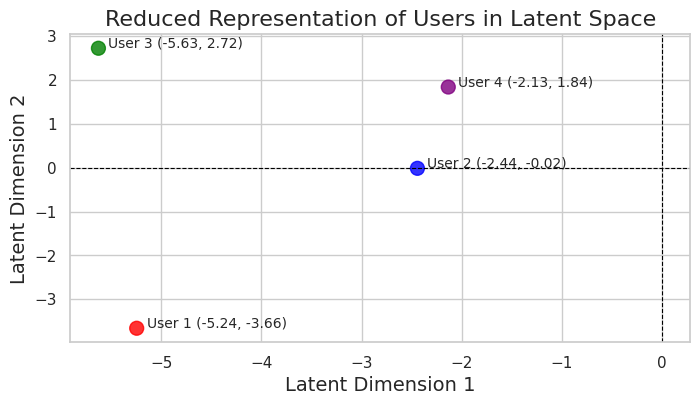

In [64]:
# Scatter plot of reduced data with user coordinates
plt.figure(figsize=(8, 4))
plt.scatter(dados_reduzidos[:, 0], dados_reduzidos[:, 1], s=100, c=['red', 'blue', 'green', 'purple'], alpha=0.8)
for i, (x, y) in enumerate(dados_reduzidos):
    plt.text(x + 0.1, y, f"User {i + 1} ({x:.2f}, {y:.2f})", fontsize=10)

plt.title("Reduced Representation of Users in Latent Space", fontsize=16)
plt.xlabel("Latent Dimension 1", fontsize=14)
plt.ylabel("Latent Dimension 2", fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.show()


#### 2. Covariance Matrix
A heatmap of the covariance matrix shows relationships between movies.

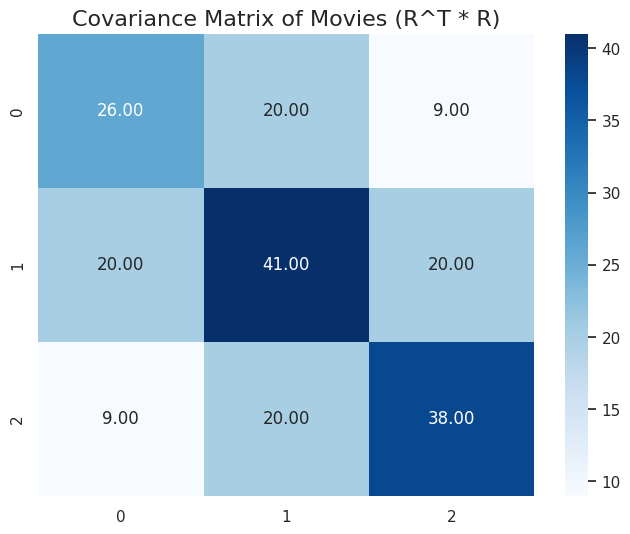

In [53]:
# Heatmap of covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Covariance Matrix of Movies (R^T * R)", fontsize=16)
plt.show()


#### 3. Reduced Data Matrix
A heatmap of the reduced user data matrix visualizes the user representation in the reduced space.

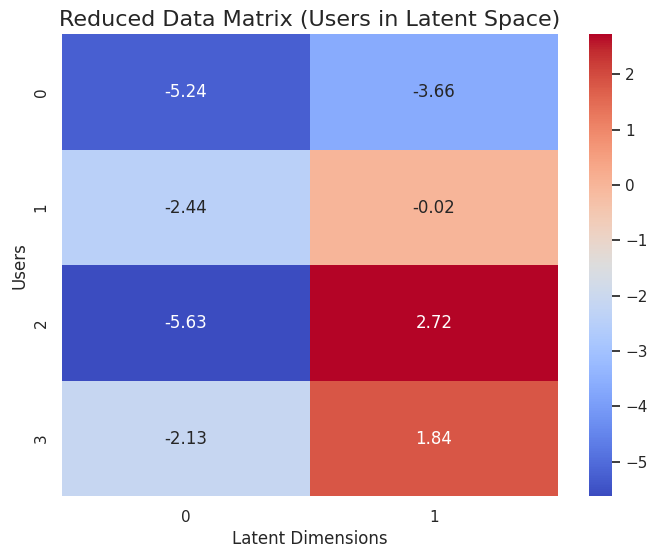

In [65]:
# Heatmap of reduced data matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dados_reduzidos, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Reduced Data Matrix (Users in Latent Space)", fontsize=16)
plt.xlabel("Latent Dimensions")
plt.ylabel("Users")
plt.show()